                                         T.A. Maryam Azhin

**Non-ideal reactors. Predicting conversion in flow reactors –II**.

**Q1**. Predicting conversion using a **maximum mixedness** (MM) model. This is the same reactor and RTD as in Q2, Seminar 1 and Q3, Seminar 2 – there we predicted the conversion using segregation model and obtained the value of $70\%$. Note that for a reaction order $>1$ the MM model should give the lowest bound on conversion (i.e., the predicted conversion should be lower than in the segregation model).

The following RTD function was obtained from a pulse tracer test to a real flow reactor:

|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(mg/dm^3)|0|0|0|5|10|5|0|0|
|E(t)|0|0|0|0.05|0.1|0.05|0|0|

This flow reactor is used to perform a second-order reaction $2A\rightarrow C$ in the liquid phase.
The entering concentration is $2 M$ and the rate constant with respect to A is $0.06\frac{dm^3}{mol s}$. Predict the conversion using a maximum mixedness model.

**Answer 1**.
We already built the RTD function and cumulative distribution function in Seminar 1 Problem 2 as follows:

Equation for the maximum mixedness model: $\frac{dX}{d \lambda}=\frac{r_A}{C_{A0}}+\frac{E(\lambda)X}{1-F(\lambda)}$

Reaction law:  $r_A=-k C_{A0}^2(1-X)^2$

By introducing the reaction law to MM model: $\frac{dX}{d \lambda}=-KC_{A0}(1-X)^2+\frac{E(\lambda)X}{1-F(\lambda)}$

Euler method evaluation:

$\frac{X_{i+1}-X_i}{\lambda_{i+1}-\lambda_{i}}=[-kC_{A0}(1-X_{i})^2+X_{i}\frac{E(\lambda_i)}{1-F(\lambda_i)}]$

$\Delta \lambda=\lambda_{i+1}-\lambda_{i}$, where $\Delta \lambda$ is a negative value

$X_{i+1}=X_{i}+\Delta \lambda [-kC_{A0}(1-X_{i})^2+X_{i}\frac{E(\lambda_i)}{1-F(\lambda_i)}]$

Initial and final conditions:

$\lambda_0=\infty$ at $X=0$

$\lambda_{final}=0$ ![Q2.png](Q1MMBB.png)

We select :

$\lambda_0=30$ and $X=0$ at this $\lambda$.
Choose $\Delta \lambda=-2$

At $\lambda=28$: $X=0+(-2)[-0.06*2*(1-0)^2+0*\frac{E(28)}{(1-F(28))}]=0.24$

At $\lambda=26$: $E(26)=0.06$, $F(26)=0.92$, $X=0.24+(-2)[-0.06*2*(1-0.14)^2+0.14*\frac{E(26)}{(1-F(26))}]=0.24+(-2)[-0.06*2*(1-0.14)^2+0.14*\frac{0.06}{(1-0.82))}]=0.22$

...

Continue until:
At $\lambda=2$:$X=0.7$ 
At $\lambda=0$: $E(0)=0$, $F(0)=0$, $X=0.7+(-2)[-0.12(1-0.7)^2+0.7*0]=0.722$

The expected conversion is $72.2\%$. Smaller step size will give the more accurate value $69\%$ - This is the lowest bound on conversion for the reaction order $>1$ (segregation model gives the highest bound on conversion for such reaction)

|t(s)|0|5|10|15|20|25|30|35|
|----|--|--|---|--|--|--|--|--|
|C(mg/dm^3)|0|0|0|5|10|5|0|0|
|E(t)|0|0|0|0.05|0.1|0.05|0|0|
|F(t)|0|0|0|0.123|.497|.874|1|1|

Text(0.5, 0, 'Time, s')

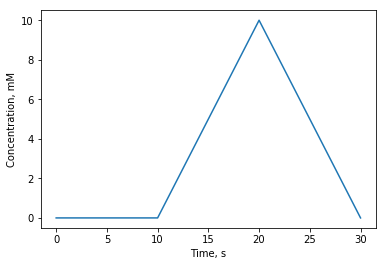

In [106]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import math

t=np.linspace(0.,30,1000)
C=np.zeros(len(t))

for i in range(0,len(t)):
    if 0<t[i]<10: 
        C[i]=0
    elif 10<=t[i]<20:
        C[i]=t[i]-10
    elif 20<=t[i]<=30:
        C[i]=30-t[i]
    else:
        C[i]=0

plt.plot(t,C)
plt.ylabel('Concentration, mM')
plt.xlabel('Time, s')

Text(0.5, 0, 'Time, s')

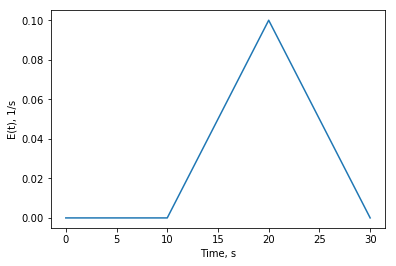

In [107]:
I = integrate.cumtrapz(C, t, initial=0) 
E=np.zeros(len(t))

for i in range(0,len(t)):
     E[i]=C[i]/I[len(I)-1]
        
plt.plot(t,E)
plt.ylabel('E(t), 1/s')
plt.xlabel('Time, s')

Text(0.5, 0, 'Time, s')

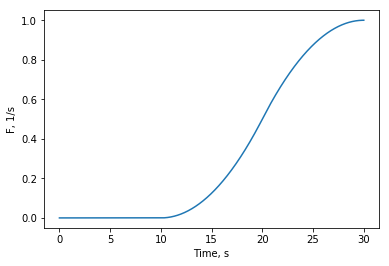

In [108]:
k3=0
k4=0
k5=0
k6=0
F=np.zeros(len(t))

for i in range (2,len(t)+1):
    F[i-1]=integrate.trapz(E[0:i],t[0:i])
    
for i in range(0,len(t)):
    if 14.99 < t[i] < 15.03:
        k3=i
    if 19.99 < t[i] < 20.02:
        k4=i
    if 24.99 < t[i] < 25.02:
        k5=i
    if 29.99 < t[i] < 30.02:
        k6=i      

plt.plot(t,F)
plt.ylabel('F, 1/s')
plt.xlabel('Time, s')

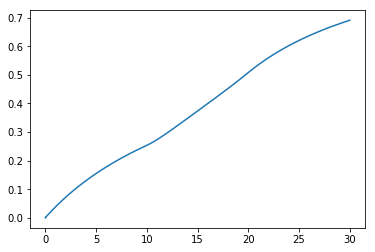

In [109]:
k = 0.06
CA0 = 2.0
del_lam=-30./1000.  
xplot=np.zeros(len(t))
X=0

for i in range(1,len(E)):
        Xnew=X+del_lam*(-k*CA0*pow((1.-X),2)+X*E[len(E)-1-i]/(1.-F[len(E)-1-i])) # explicit Euler
        X=Xnew
        xplot[i]=Xnew
                                                    
plt.plot(t,xplot)

-------------------------------------------------------------------

**Q2**. Evaluation of dead zones in a gas/liquid contactor. The problem is “Chemical Reaction Engineering”, 3rd Ed. 1999, by Octave Levenspiel (Example 12.1, page 289). From the measured pulse tracer response, find the fraction of gas, of flowing liquid, and of stagnant liquid in the gas-liquid contactor.

(The contactor is a packed column filled, for example, with Raschig rings).

![Q2.png](S3Q2.png)

**Answer 2**.

Volumetric flow rates of gas and liquid are given (constant) as $m3/s$. 

If we know the mean **residence time** of each phase in the reactor, we will be able to find the occupied volume by that phase.

For the liquid phase the tracer output is near- symmetrical and can be well approximated by the mean
residence time of $\bar{t}_{liquid}=40s$.

For the gas phase, we need to find mean residence time. The tracer concentration value is not given on the vertical axis. 

Let $x$ be maximum $C_g$ at $9 s$:

$\int_0^\infty C(t) dt=\frac{9-6}{2}x+\frac{15-9}{2}x=4.5x\;\;\; \frac{mol}{L*s}$



1) $E(t)=0$ for $t=<6 s$ and $t>=15s$

2) For $6=<t=<9 s$, the slope is $(x-0)/(9-6)=x/3$; 

so the line eqaution is $C(t)=x/3*(t-6)$.

Then $E(t)=\frac{C(t)}{\int_0^\infty C(t) dt}=\frac{\frac{x}{3}(t-6)}{4.5x}=\frac{t-6}{13.5}$


For $9=<t=<15 s$, the slope is $(0-x)/(15-9)=-x/6$; 

so the line eqaution is $C(t)=-x/6*(t-15)$.

Then $E(t)=\frac{C(t)}{\int_0^\infty C(t) dt}=\frac{\frac{-x}{6}(t-15)}{4.5x}=\frac{15-t}{27}$

So mean residence time for gas is 
$\bar{t}_{gas}=\int_0^\infty tE(t)dt=0+\frac{1}{13.5}\int_6^9 t(t-6)dt+\frac{1}{27}\int_9^{15}t(15-t)dt+0$
$\bar{t}_{gas}=\frac{1}{13.5}(\frac{9^3}{3}-\frac{6^3}{3})-\frac{6}{13.5}(\frac{9^2}{2}-\frac{6^2}{2})+\frac{15}{27}(\frac{15^2}{2}-\frac{9^2}{2})-\frac{1}{27}(\frac{15^3}{3}-\frac{9^3}{3})=10s$


mean residence time =10.0 (s)


Text(0.5, 0, 'Time, s')

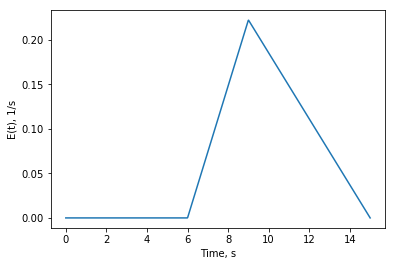

In [104]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

t2=np.linspace(0.,15,1000)
E2=np.zeros(len(t2))

for i in range(0,len(t2)):
    if 0<t2[i]<6: 
        E2[i]=0
    elif 6<=t2[i]<9:
        E2[i]=(t2[i]-6)/13.5
    elif 9<=t2[i]<=15:
        E2[i]=(15-t2[i])/27.
    else:
        E2[i]=0

t_r=np.zeros(len(t2))
for i in range(0,len(t2)):
    t_r[i]=t2[i]*E2[i]

tr = integrate.trapz(t_r, t2)

print ("mean residence time ={0:.1f}".format(tr), '(s)')

plt.plot(t2,E2)
plt.ylabel('E(t), 1/s')
plt.xlabel('Time, s')

Since the volumetric flow rates are constant, the contactor **volume occupied by liquid** is $\bar{t}_{liquid}*Q(L)=40s*0.1m^3/s=4m^3$. 

The **volume occupied by the gas** is $\bar{t}_{gas}= 10s* 0.5 m^3/s = 5 m^3$.

So, the **total active volume** of the contactor is $5+4 = 9 m^3$. 

The **total volume with Raschig rings** is $1 m^2 * 20 m= 20 m^3$, but the voidage (i.e., free space without the rings) is $0.5$, so the **total volume available for the fluids** is $10 m^3$. Thus, $10 – 9 = 1 m^3$ is not active, i.e., **dead (or stagnant) zone volume**. The contactor must be cured.

**Fractions the voidage**:

*Gas* $50\%$, 

*Liquid* $40\%$,

and $10\%$ *Stagnant liquid zone*. 

----------------------------------------------------------

**Q3**. **Tanks-in-series and maximum mixedness models for a 1st order reaction**. Based on S. Fogler, Elements of Chemical Reaction Engineering, 4th Ed. P14-8. The following E(t) curve was obtained from a tracer test on a reactor (time in minutes):

$E(t) = 0.25t\;\;\;$  for   $\;\;\;0<t<2$ 

$E(t) = 1 – 0.25t\;\;\;$  for   $\;\;\;2<t<4$

$E(t) = 0\;\;\;$  for   $\;\;\;t>4$. 

The conversion predicted by the tanks-in-series model for the isothermal liquid-phase elementary reaction $A\rightarrow B$ is $50\%$ at $300 K$. 

What is the conversion predicted by the maximum mixedness model? 

What is the reaction rate constant at $300 K$?

**Answer 3**. 

For a first order reaction, $X_{MM}=X_{TIS}=50\%$

$X_{TIS}=1-\frac{1}{(1+Da)^n}$

In a 1st order reaction: $Da=\tau.k$

$\tau=\bar{t}=\int_0^\infty t.E(t)dt=\int_0^2 0.25t^2dt+\int_2^4(1-0.25t)tdt=2 min$

$\sigma^2=\int_0^\infty E(t)(t-\bar{t})^2dt=\int_0^\infty E(t)t^2dt-\tau^2=\frac{2}{3} min^2$

$n=\frac{\tau^2}{\sigma^2}=6$

for $300k$ $X=50\%$:

$0.5=1-\frac{1}{(1+k\tau)^6}$
here $\tau_{tank}=\frac{\tau_{PFR}}{n_{tanks}}=\frac{2}{6}$

$0.5=1-\frac{1}{(1+k*\frac{2}{6})^6}$

$k=0.367 min^{-1}$

mean residence time of PFR=2.0 (min)


Text(0.5, 0, 'Time, min')

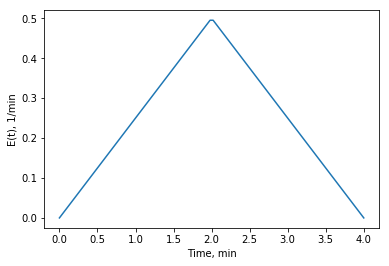

In [121]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

t3=np.linspace(0.,4,100)
E3=np.zeros(len(t3))

for i in range(0,len(t3)):
    if 0<t3[i]<2: 
        E3[i]=0.25*t3[i]
    elif 2<=t3[i]<4:
        E3[i]=1-0.25*t3[i]
    else:
        E3[i]=0

t_r3=np.zeros(len(t3))
for i in range(0,len(t3)):
    t_r3[i]=t3[i]*E3[i]

tr3 = integrate.trapz(t_r3, t3)

print ("mean residence time of PFR={0:.1f}".format(tr3), '(min)')

plt.plot(t3,E3)
plt.ylabel('E(t), 1/min')
plt.xlabel('Time, min')

In [120]:
v=np.zeros(len(t3))

for i in range(0,len(t3)):
    v[i]=t3[i]*t3[i]*E3[i]
    

Va = integrate.trapz(v, t3)
Var=Va-(tr3*tr3)
n=math.ceil((tr3*tr3)/Var)

print ("Varience of residence times = {0:.3f}".format(Var), 'min^2')
print ("n = {0:.3f}".format(n))

Varience of residence times = 0.667 min^2
n = 6.000


$0.5=1-\frac{1}{(1+k\tau)^6}$


$0.5=\frac{1}{(1+k\tau)^6}$

$(1+k\tau)^6=2$

$1+k\tau = 2^{1/6}$

$k= \frac{(2^{1/6} -1)}{\tau}$


In [126]:
trcstr = tr3/n
k=(pow(2,1./6.)-1.)/trcstr

print ("mean residence time of a CSTR={0:.1f}".format(trcstr), '(min)')
print ("k={0:.3f}".format(k), '(1/min)')

mean residence time of a CSTR=0.3 (min)
k=0.367 (1/min)
